# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [49]:
url='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

### Step 3. Assign it to a variable called chipo.

In [50]:
df=pd.read_csv(url,sep='\t')

### Step 4. See the first 10 entries

In [51]:
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: 0, dtype: int64


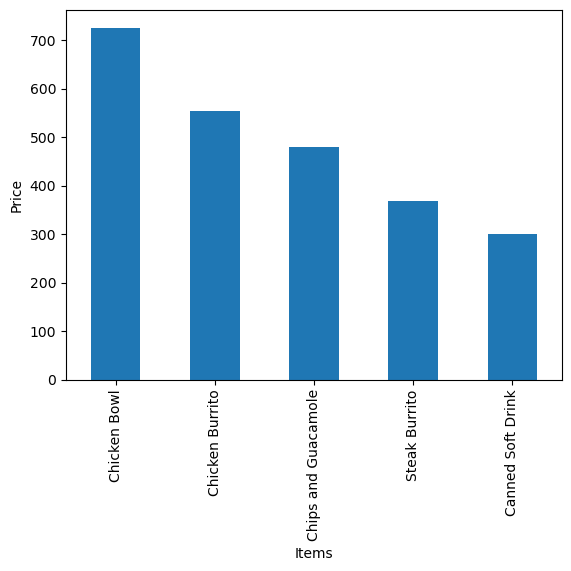

In [52]:
x=df.item_name
# print(x)
letter_counts = Counter(x)
y = pd.DataFrame.from_dict(letter_counts, orient='index')
y = y[0].sort_values(ascending = False)[0:5]
print(y)
y.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Price')
plt.show()


### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

(0.0, 36.7)

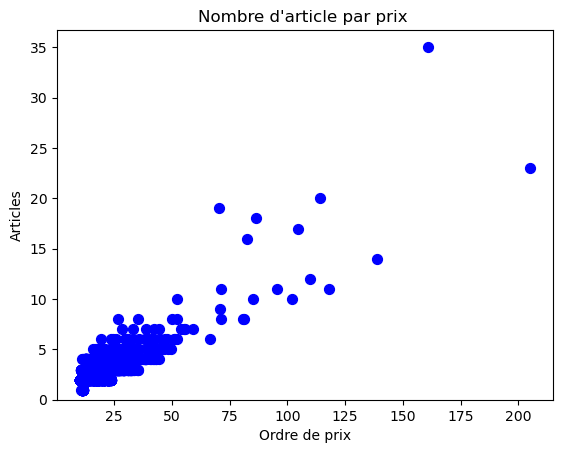

In [53]:
df.item_price = [float(value[1:-1]) for value in df.item_price] # Supprime le signe $ de la colonne item_price
orders = df.groupby('order_id').sum()

plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'blue')
plt.xlabel('Ordre de prix')
plt.ylabel('Articles')
plt.title("Nombre d'article par prix ")
plt.ylim(0)

### Step 7. BONUS: Create a question and a graph to answer your own question.

Quelle est la quantité la plus vendue par article ?

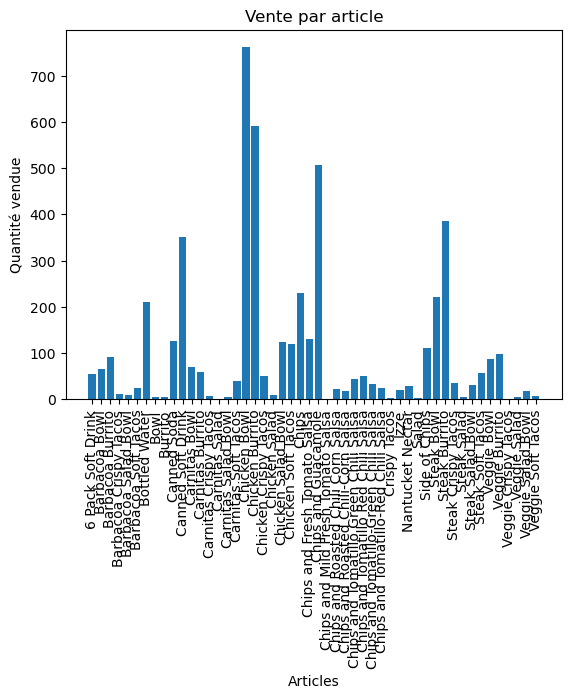

In [57]:

orders = df.groupby('item_name').sum()
x = orders.index
y = orders['quantity']

plt.xlabel('Articles')
plt.ylabel('Quantité vendue')
plt.title("Vente par article")

plt.bar(x, y)
plt.xticks(rotation=90)  
plt.show()
